In [2]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler



In [3]:

# first, we will load the data and conduct k means clustering to create the "TRUE labels"
# we will use the HOMA2IR and HOMA2B data to create the labels
# we will use the first 6 cohorts


path = '/Users/zhongyuli/Desktop/python/cluster analysis/dataset/final_dataset.csv'

analytic_dataset = pd.read_csv(path) 

#drop missing values
method3_df = analytic_dataset[analytic_dataset['method3'] == 1]

#select variables 
selected_variables = ['bmi', 'hba1c', 'dmagediag','homa2b','homa2ir','tgl','ldlc','ratio_th','sbp','dbp','hdlc']
#drop missing values in the selected variables
method3_df = method3_df[selected_variables]
method3_df = method3_df.dropna()

#check the data
method3_df.head()


,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc
2106,37.39471,6.7,57.0,1250.5,12.345679,104,84.0,2.311111,132.66667,67.33333,45.0
2107,34.68809,5.6,70.0,911.0,20.408163,112,114.0,3.200000,154.00000,92.00000,35.0
2108,31.46388,7.6,75.0,881.1,16.393443,122,134.0,2.652174,138.33333,69.66667,46.0
2109,26.47712,6.8,87.0,766.7,8.264463,168,56.0,3.818182,117.66667,54.33333,44.0
2110,35.34697,6.1,73.0,673.5,13.888889,92,94.0,1.672727,141.00000,69.00000,55.0


In [4]:
# check if there are any missing values
method3_df.isnull().sum()
# check variable types
method3_df.dtypes


bmi          float64
hba1c        float64
dmagediag    float64
homa2b       float64
homa2ir      float64
tgl            int64
ldlc         float64
ratio_th     float64
sbp          float64
dbp          float64
hdlc         float64
dtype: object

In [6]:
#run kmeans clustering
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
method3_df_scaled = scaler.fit_transform(method3_df)

method3_df_scaled = pd.DataFrame(method3_df_scaled, columns=method3_df.columns)

In [7]:
method3_df_scaled.head()

,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc
0,0.554679,0.324154,-0.349968,13.182062,3.156100,-0.515797,-0.723383,-0.430527,0.446682,-0.522093,-0.162823
1,0.171496,-0.812598,0.643570,9.198821,6.074901,-0.424758,0.140179,-0.133499,1.609660,1.089272,-0.944319
2,-0.284964,1.254224,1.025701,8.848014,4.621482,-0.310958,0.715887,-0.316559,0.755597,-0.369666,-0.084673
3,-0.990953,0.427495,1.942813,7.505797,1.678608,0.212517,-1.529375,0.073071,-0.371038,-1.371326,-0.240972
4,0.264775,-0.295893,0.872849,6.412312,3.714777,-0.652356,-0.435529,-0.643848,0.900970,-0.413217,0.618674


In [8]:
# run kmeans and get cluster labels from the five variable method (method 3)
kmeans = KMeans(
    init="random", n_clusters=4, n_init=10, max_iter=300, random_state=57
)

# select five variables to cluster
var_m3 = ['bmi', 'hba1c', 'dmagediag','homa2b','homa2ir']
cluster_m3 = method3_df_scaled[var_m3]

kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=57)
kmeans.fit(cluster_m3)

KMeans(init='random', n_clusters=4, n_init=10, random_state=57)

In [9]:
# summarize the cluster labels 
method3_df['cluster'] = kmeans.labels_
method3_df['cluster'].value_counts()


cluster
2    1479
0    1311
1     278
3     133
Name: count, dtype: int64

In [10]:
# remane the cluster labels
method3_df['cluster'] = method3_df['cluster'].replace({0: 'MOD', 1: 'SIRD', 2: 'MARD', 3: 'SIDD'})
method3_df['cluster'].value_counts()
#summarize variables by cluster
method3_df.groupby('cluster').mean()

,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc
cluster,,,,,,,,,,,
MARD,29.369065,6.145030,70.949620,88.007505,2.156878,136.498986,103.832454,3.053788,126.987878,70.376148,49.733874
MOD,37.897690,6.312304,51.008597,136.291228,4.005769,161.395881,116.464989,4.100154,121.772548,81.032541,44.269870
SIDD,35.051995,9.692481,52.957565,61.986466,3.545542,160.804511,111.992481,4.073117,120.390099,82.586274,45.105263
SIRD,33.727952,6.437410,65.700768,321.332374,9.709215,155.147482,101.356115,3.915294,125.780245,71.269633,47.197842


In [12]:
# processing    
scaler = MinMaxScaler()
nmf_scaled = scaler.fit_transform(method3_df.drop(columns=['cluster']))
nmf_scaled = pd.DataFrame(nmf_scaled, columns=method3_df.drop(columns=['cluster']).columns)
nmf_scaled.head()

,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc
0,0.370586,0.227941,0.454545,1.00000,0.455800,0.047715,0.245353,0.032381,0.539326,0.240964,0.213740
1,0.323930,0.147059,0.651515,0.72840,0.754656,0.053091,0.356877,0.047076,0.683146,0.419277,0.137405
2,0.268351,0.294118,0.727273,0.70448,0.605841,0.059812,0.431227,0.038020,0.577528,0.257831,0.221374
3,0.182389,0.235294,0.909091,0.61296,0.304520,0.090726,0.141264,0.057296,0.438202,0.146988,0.206107
4,0.335287,0.183824,0.696970,0.53840,0.513003,0.039651,0.282528,0.021827,0.595506,0.253012,0.290076


In [13]:
from sklearn.decomposition import NMF
# Convert the DataFrame to a 2D numpy array
var_nmf = ['bmi', 'hba1c', 'dmagediag','tgl','ldlc','ratio_th','sbp','dbp','hdlc']
V = nmf_scaled[var_nmf].values

# Initialize the NMF model with NNDSVD initialization
nmf = NMF(n_components=4, init='nndsvd', random_state=0, max_iter=2000)

# Fit the model to the data and get the factors
W = nmf.fit_transform(V)
H = nmf.components_


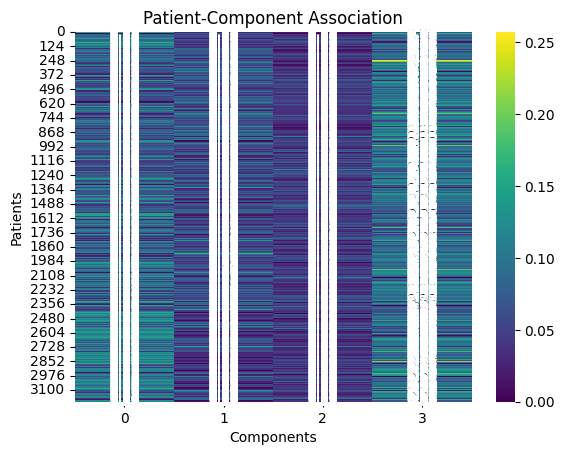

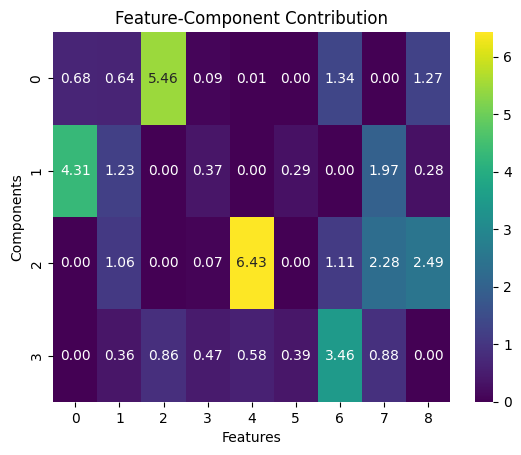

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'W' and 'H' are the factorization matrices from NMF
sns.heatmap(W, annot=True, fmt=".2f", cmap='viridis')
plt.title('Patient-Component Association')
plt.xlabel('Components')
plt.ylabel('Patients')
plt.show()

sns.heatmap(H, annot=True, fmt=".2f", cmap='viridis')
plt.title('Feature-Component Contribution')
plt.xlabel('Features')
plt.ylabel('Components')
plt.show()


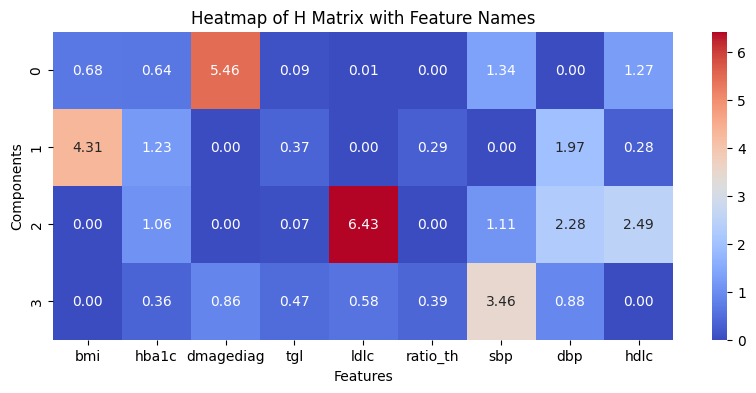

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert H to a DataFrame and rename columns to match original dataset
H_df = pd.DataFrame(H, columns=nmf_scaled[var_nmf].columns)

# Creating the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(H_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of H Matrix with Feature Names')
plt.xlabel('Features')
plt.ylabel('Components')
plt.show()


### Tuning NMF parameters

In [31]:
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV

# Convert the DataFrame to a 2D numpy array
var_nmf = ['bmi', 'hba1c', 'dmagediag','tgl','ldlc','ratio_th','sbp','dbp','hdlc']
V = nmf_scaled[var_nmf].values

# Define the parameter grid
param_grid = {
    'n_components': [2, 3, 4, 5],  # number of components
    'init': ['random', 'nndsvd'],  # initialization method
    'max_iter': [1000, 2000, 3000]  # maximum number of iterations
}

# Initialize the NMF model
nmf = NMF()

# Perform grid search
grid_search = GridSearchCV(nmf, param_grid, cv=5)
grid_search.fit(V)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize the NMF model with the best parameters
best_nmf = NMF(**best_params)

# Fit the model to the data and get the factors
W = best_nmf.fit_transform(V)
H = best_nmf.components_


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator NMF() does not.

In [17]:
# now use the W matrix to cluster the patients

# Initialize the KMeans model
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model to the W matrix
kmeans.fit(W)

# Get the cluster assignments
clusters = kmeans.labels_

# Add the cluster assignments to the original data
method3_df['cluster_nmf'] = clusters


In [19]:
method3_df.head()

,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc,cluster,cluster_nmf
2106,37.39471,6.7,57.0,1250.5,12.345679,104,84.0,2.311111,132.66667,67.33333,45.0,SIRD,1
2107,34.68809,5.6,70.0,911.0,20.408163,112,114.0,3.200000,154.00000,92.00000,35.0,SIRD,3
2108,31.46388,7.6,75.0,881.1,16.393443,122,134.0,2.652174,138.33333,69.66667,46.0,SIRD,3
2109,26.47712,6.8,87.0,766.7,8.264463,168,56.0,3.818182,117.66667,54.33333,44.0,SIRD,2
2110,35.34697,6.1,73.0,673.5,13.888889,92,94.0,1.672727,141.00000,69.00000,55.0,SIRD,3


In [25]:
# summarze by cluster
method3_df.groupby('cluster_nmf').size()
# fisrt take out cluster and then summarize variables by cluster_nmf
cluster = method3_df['cluster']
method3_df = method3_df.drop(columns=['cluster'])

method3_df.groupby('cluster_nmf').mean()








,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc
cluster_nmf,,,,,,,,,,,
0,35.128251,6.479233,51.085479,129.840406,3.709672,143.743792,125.906321,3.359611,110.364026,81.200098,47.000000
1,38.754042,6.560637,49.099222,144.742074,4.576461,186.265185,108.783704,5.160600,134.354813,83.773959,40.970370
2,30.134144,6.225092,73.454965,115.830845,2.982048,124.026928,102.016524,2.591522,116.082893,63.320848,52.938678
3,30.688699,6.303402,71.322615,120.342892,3.402297,150.150668,98.415917,3.578052,139.885689,73.989154,46.374605


In [32]:
method3_df.groupby('cluster_nmf').size()

cluster_nmf
0    886
1    675
2    817
3    823
dtype: int64

In [41]:
# now try kmeans on the original data
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_scaled)
clusters2 = kmeans.labels_
data_8c_clean['cluster2'] = clusters2
data_8c_clean.groupby('cluster2').mean()

,bmi,hba1c,ldlc,hdlc,tgl,sbp,dbp,ratio_th,dmagediag,cluster
cluster2,,,,,,,,,,
0,30.019374,6.210634,77.206237,46.209816,136.297546,122.342440,63.578368,3.288853,74.933745,0.798569
1,42.892357,6.598145,113.165379,43.562597,150.493045,123.404124,86.668906,3.855108,48.664419,1.185471
2,31.440062,6.255745,118.470213,46.937234,165.901064,116.886587,78.232946,4.122392,52.136625,2.717021
3,30.993609,6.256292,124.871461,52.339888,137.589888,135.959444,72.923806,2.914894,71.972981,1.110112
